In [1]:
# t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction algorithm used to project high-dimensional data (e.g., 50D/300D embeddings) into 2D or 3D while preserving local similarity.
# “t-SNE helps us visualize word embeddings so that similar words appear close together.”

# Why do we need t-SNE for embeddings?
# Word embeddings live in high dimensions (50, 100, 300)
# Humans can only visualize 2D or 3D
# t-SNE helps us see semantic relationships

# 🧱 Pipeline for Visualization
# Trained Word Embeddings (Word2Vec / FastText)
#         ↓
# Select words
#         ↓
# High-dimensional vectors (50D)
#         ↓
# t-SNE
#         ↓
# 2D points
#         ↓
# Plot clusters


In [ ]:
import spacy
from gensim.models import Word2Vec
nlp = spacy.load("en_core_web_sm")

texts = [
    "I love this product",
    "This is an amazing experience",
    "I hate this item",
    "This is the worst service"
]

labels = [1, 1, 0, 0]  # 1 = Positive, 0 = Negative


def preprocess(text):
    doc = nlp(text)
    return [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha and not token.is_stop
    ]

preprocess_texts = [preprocess(text) for text in texts]
print(preprocess_texts)
w2v_model = Word2Vec(
    sentences=preprocess_texts,
    window=3,
    vector_size=50,
    sg=1,
    min_count=1,
    workers=4
)


[['love', 'product'], ['amazing', 'experience'], ['hate', 'item'], ['bad', 'service']]


In [6]:
# Embedding with fixed sizes
import numpy as np
from sklearn.linear_model import LogisticRegression

def sentence_vector(sentence, model, vector_size=50):
    vector = [
        model.wv[word]
        for word in sentence
        if word in model.wv
    ]
    return np.mean(vector, axis=0)

X = np.array([sentence_vector(sentence, w2v_model) for sentence in preprocess_texts])

clf = LogisticRegression()
clf.fit(X, labels)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
########## PIPELIne
words = np.array(w2v_model.wv.index_to_key) # Took out all the keys 
vectors = np.array([w2v_model.wv[word] for word in words]) # Converting the keys to vectors

In [26]:
# Apply t-SNE
# We reduce 50D → 2D.
from sklearn.manifold import TSNE
tsne = TSNE(
    n_components=2,
    perplexity=5,
    random_state=42
)

# Key Parameters (INTERVIEW GOLD)
# n_components=2 → 2D visualization
# perplexity → controls neighborhood size (5–50 typical)
# random_state → reproducibility

vectors_2d = tsne.fit_transform(vectors)


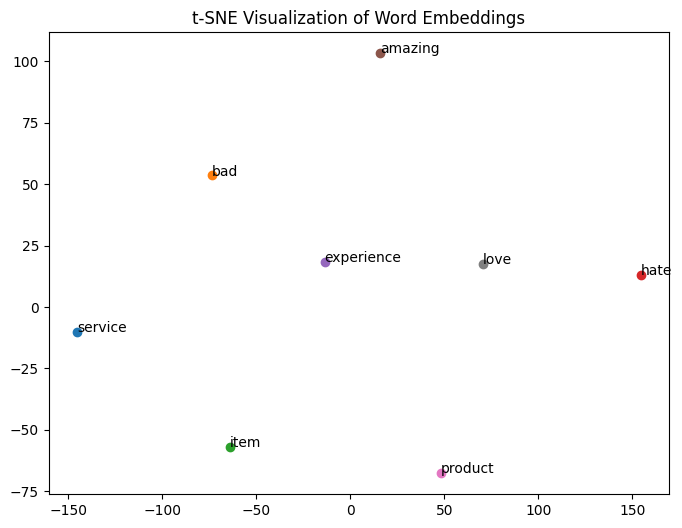

In [ ]:
# “After training word embeddings, I use t-SNE to reduce their dimensionality to 2D for visualization. t-SNE preserves local similarity, 
# so words with similar meanings appear closer together, helping us understand how embeddings capture semantic relationships.”

# “t-SNE preserves global distance” → WRONG
# ✅ It preserves local neighborhood structure
# ❌ Using t-SNE for training models
# ✅ Use it only for visualization & analysis

# Debug embeddings
# Compare models (Word2Vec vs FastText)
# Explain NLP models visually to non-technical stakeholders

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    x, y = vectors_2d[i]
    plt.scatter(x, y)
    plt.text(x, y, word, fontsize=10)

plt.title("t-SNE Visualization of Word Embeddings")
plt.show()

In [27]:
### PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)


In [ ]:
from sklearn.manifold import umap

umap_model = umap.UMAP(n_components=2, n_neighbors=5, random_state=42)
vectors_umap = umap_model.fit_transform(vectors)


ImportError: cannot import name 'umap' from 'sklearn.manifold' (/media/scientist-anand/volume/mr_document/all_venv/chatterbox_venv/lib/python3.10/site-packages/sklearn/manifold/__init__.py)